In [1]:
!pip install pandas


In [3]:
import pandas as pd

# Load the main CSV file
df = pd.read_csv('data/large_text_with_emotions.csv')

# Ensure the emotion label column is named correctly
sentiment_column = 'sentiment'  # use the actual column name

# Group by the emotion label
grouped = df.groupby(sentiment_column)

# Iterate through the groups and save each to a separate CSV file
for emotion, group in grouped:
    filename = f'tweets_{emotion}.csv'
    group.to_csv(filename, index=False)
    print(f'Saved {len(group)} tweets to {filename}')


Saved 110 tweets to tweets_anger.csv
Saved 179 tweets to tweets_boredom.csv
Saved 827 tweets to tweets_empty.csv
Saved 759 tweets to tweets_enthusiasm.csv
Saved 1776 tweets to tweets_fun.csv
Saved 5209 tweets to tweets_happiness.csv
Saved 1323 tweets to tweets_hate.csv
Saved 3842 tweets to tweets_love.csv
Saved 8638 tweets to tweets_neutral.csv
Saved 1526 tweets to tweets_relief.csv
Saved 5165 tweets to tweets_sadness.csv
Saved 2187 tweets to tweets_surprise.csv
Saved 8459 tweets to tweets_worry.csv


In [4]:
unique_sentiments = df['sentiment'].unique()

# Print the unique values and their count
print(f'There are {len(unique_sentiments)} unique sentiment types.')
print(unique_sentiments)

There are 13 unique sentiment types.
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [5]:
# Get the number of rows in the DataFrame
num_rows = df.shape[0]

# Print the number of rows
print(f'The file large_text_with_emotions.csv contains {num_rows} rows.')

The file large_text_with_emotions.csv contains 40000 rows.


In [6]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 3.6 MB/s eta 0:00:00a 0:00:01


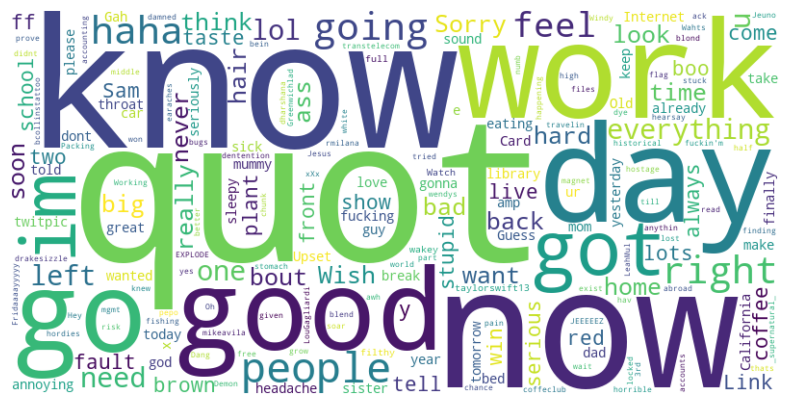

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the specific CSV file
df = pd.read_csv('tweets_anger.csv')

# Join the content of the "content" column into a single string
all_text = ' '.join(df['content'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


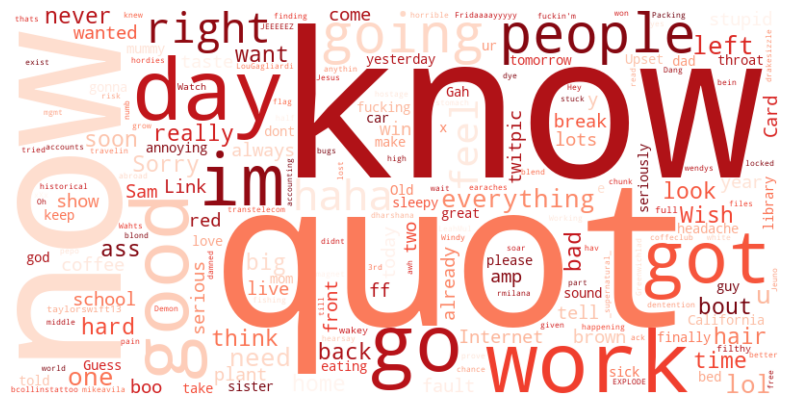

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the specific CSV file
df = pd.read_csv('tweets_anger.csv')

# Join the content of the "content" column into a single string
all_text = ' '.join(df['content'].astype(str))

# Generate the word cloud with red color
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_text)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


In [9]:
print(all_text)

fuckin'm transtelecom Working   But it's Fridaaaayyyyy Packing  I don't like it.. I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang. &quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo @LouGagliardi  damned hordies @bcollinstattoo yes, boo for soar throats and earaches! My stomach is all EXPLODE from the wendys  why is everything that tastes good bad for you? @rmilana Hey, Wahts happening in #coffeclub..? I didnt have coffee for two days now  @dharshana Did a historical Jesus ever exist? Im finding it hard to prove, its all hearsay accounts ... it bugs me ... lost all my files since high school. i hav a chance to win $10, $100, $1000.  i was given a free can of $ plant..have to wait till the plant grow to know if i won anythin!!?! i never knew a dentention was so hard 2 get @drakesizzle  If you don't want to come then don't come. JEEEEEZ. @_supern

In [10]:
len(all_text)

8653

[nltk_data] Downloading package punkt to /Users/ellenyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ellenyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


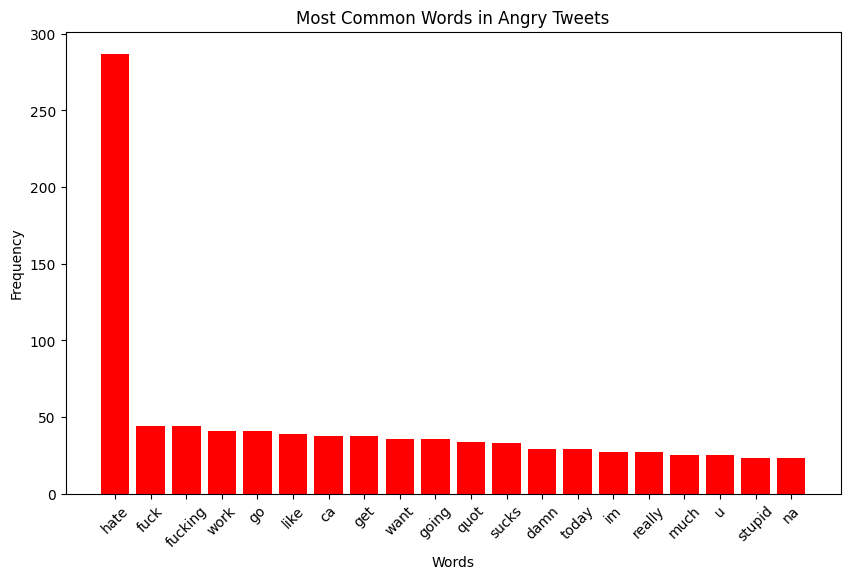

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('tweets_anger.csv')

all_text = ' '.join(df['content'].astype(str))

tokens = word_tokenize(all_text.lower())

# Remove punctuation and stopwords
tokens = [word for word in tokens if word.isalnum()]
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

most_common_words = word_counts.most_common(20)

word_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(word_df['word'], word_df['count'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Angry Tweets')
plt.xticks(rotation=45)
plt.show()


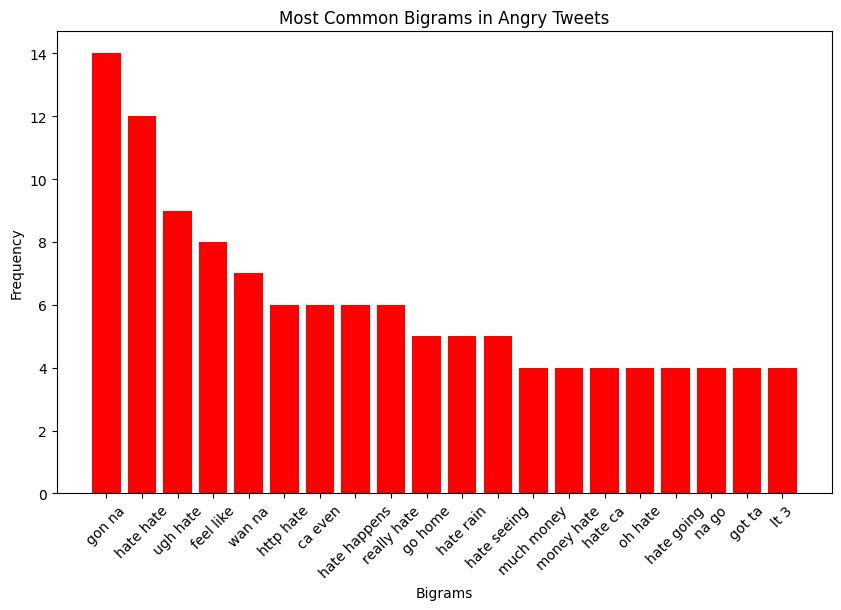

In [2]:
import pandas as pd
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_anger.csv')

all_text = ' '.join(df['content'].astype(str))

tokens = word_tokenize(all_text.lower())

tokens = [word for word in tokens if word.isalnum()]
filtered_tokens = [word for word in tokens if word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)

bigram_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10, 6))
plt.bar(bigram_df['bigram'], bigram_df['count'], color='red')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Common Bigrams in Angry Tweets')
plt.xticks(rotation=45)
plt.show()


In [14]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.2 MB/s eta 0:00:00a 0:00:01


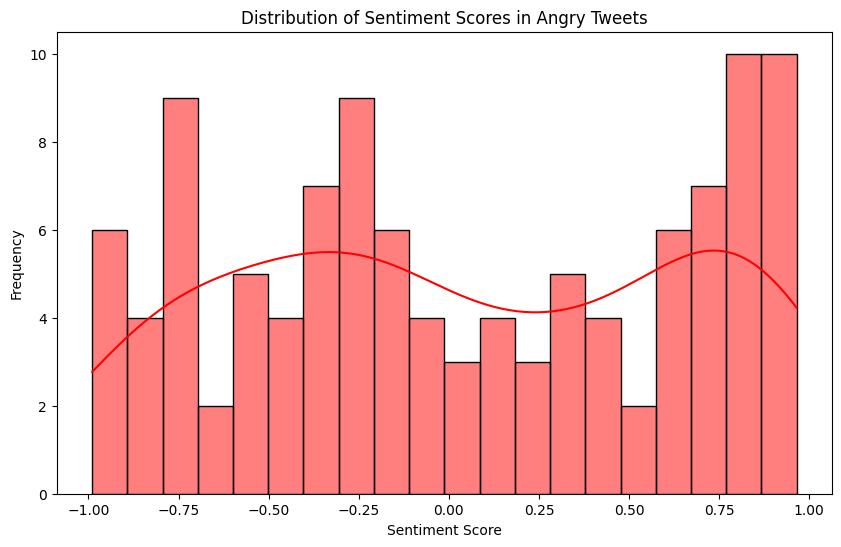

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_anger.csv')

# Assume the sentiment analysis results are in a column named 'sentiment_score'
# Here I am just simulating sentiment scores for demonstration
# df['sentiment_score'] = your_sentiment_analysis_function(df['content'])

# For demonstration, we generate random sentiment scores
import numpy as np
df['sentiment_score'] = np.random.uniform(-1, 1, df.shape[0])

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='red')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores in Angry Tweets')
plt.show()


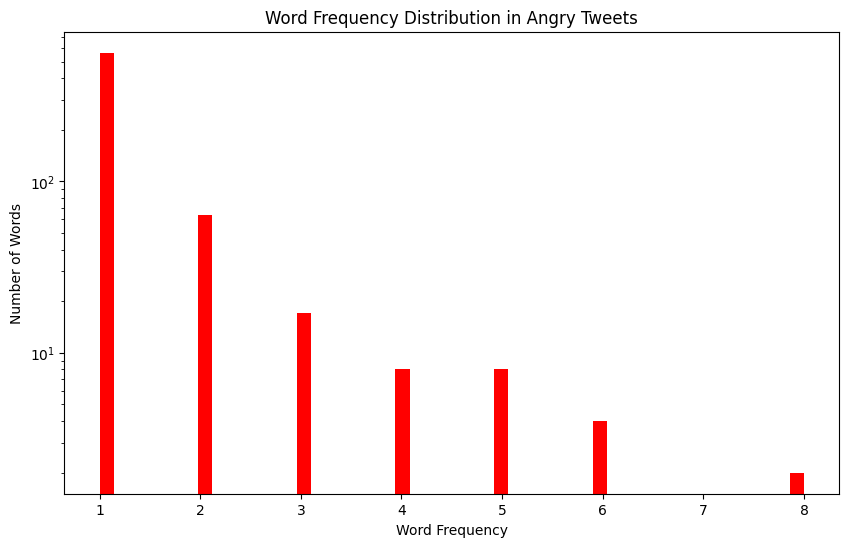

In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load the specific CSV file
df = pd.read_csv('tweets_anger.csv')

# Join the content of the "content" column into a single string
all_text = ' '.join(df['content'].astype(str))

# Tokenize the text
tokens = word_tokenize(all_text.lower())

# Remove punctuation and stopwords
tokens = [word for word in tokens if word.isalnum()]
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the word frequencies
word_freq = list(word_counts.values())

# Plot the word frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_freq, bins=50, color='red', log=True)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Word Frequency Distribution in Angry Tweets')
plt.show()
